In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('data.csv', encoding='cp1251') 


In [12]:
print(df.head())

       Дата  Склад Контрагент Номенклатура  Количество
0  1/4/2018      1  address_0    product_0           4
1  1/4/2018      1  address_0    product_1           4
2  1/4/2018      1  address_0    product_2           5
3  1/4/2018      1  address_0    product_3          10
4  1/4/2018      1  address_0    product_4           2


In [ ]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

Проверяем формат столбцов

In [13]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [14]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')


In [16]:
print(df.dtypes)  
print(df.head()) 

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object
        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


Сгруппируйте данные по дате, посчитайте количество продаж

In [17]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [18]:
print(grouped_df.head())


        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

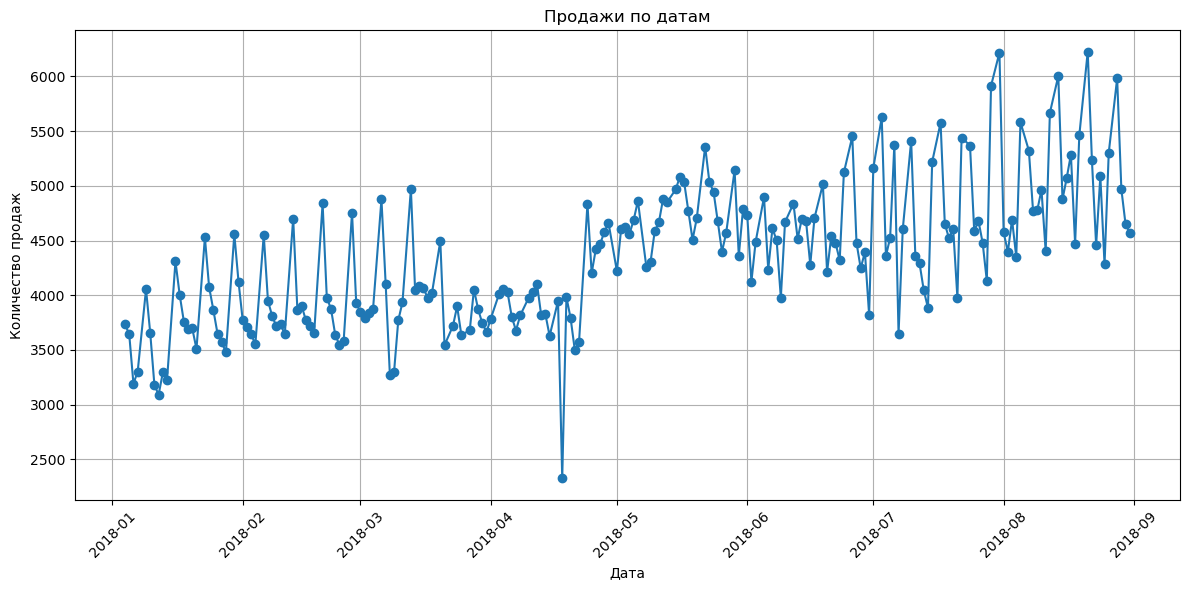

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')


plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

Продажи растут с января по сентябрь 2018 года. Начиная с мая виден особенно заметный рост. Есть регулярные колебания — вероятно, недельные. 
В начале апреля — резкий спад, возможно, из-за праздников. Летом значения достигают пика.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [25]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [26]:
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]


In [27]:
max_outlier = outliers.sort_values(by='Количество', ascending=False).head(1)
print(max_outlier)


             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [28]:
summer_wednesdays = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) & 
    (df['Дата'].dt.dayofweek == 2) &  # 0=Пн, 1=Вт, 2=Ср, ...
    (df['Склад'] == 3)
]

# Группируем по товарам и считаем сумму продаж
top_product = summer_wednesdays.groupby('Номенклатура')['Количество'].sum().sort_values(ascending=False)

# Выводим топ-1
print("Топовый товар по продажам по средам (летом) на складе 3:")
print(top_product.head(1))

Топовый товар по продажам по средам (летом) на складе 3:
Номенклатура
product_1    2267
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [67]:
df = pd.read_csv('weather_edited.csv')

In [70]:
df.head()


,datetime,avg_tempature,date_only
0,31.08.2018 23:00,8.2,8/31/2018
1,31.08.2018 20:00,9.6,8/31/2018
2,31.08.2018 17:00,11.3,8/31/2018
3,31.08.2018 14:00,12.3,8/31/2018
4,31.08.2018 11:00,13.2,8/31/2018


In [69]:
df = df[['datetime', 'avg_tempature', 'date_only']]


In [71]:
df['date_only'] = pd.to_datetime(df['date_only'])

In [73]:
df_daily_temp = df.groupby('date_only')['avg_tempature'].mean().reset_index()
df_daily_temp.columns = ['date', 'T']

In [74]:
print(df_daily_temp.head())

        date        T
0 2018-01-04 -14.0750
1 2018-01-05 -16.8625
2 2018-01-06 -13.3000
3 2018-01-07 -12.7500
4 2018-01-08 -15.4125


In [80]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])


In [81]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])              # таблица с продажами
df_daily_temp['date'] = pd.to_datetime(df_daily_temp['date'])        # таблица с температурой


In [82]:
merged_df = pd.merge(grouped_df, df_daily_temp, left_on='Дата', right_on='date', how='inner')


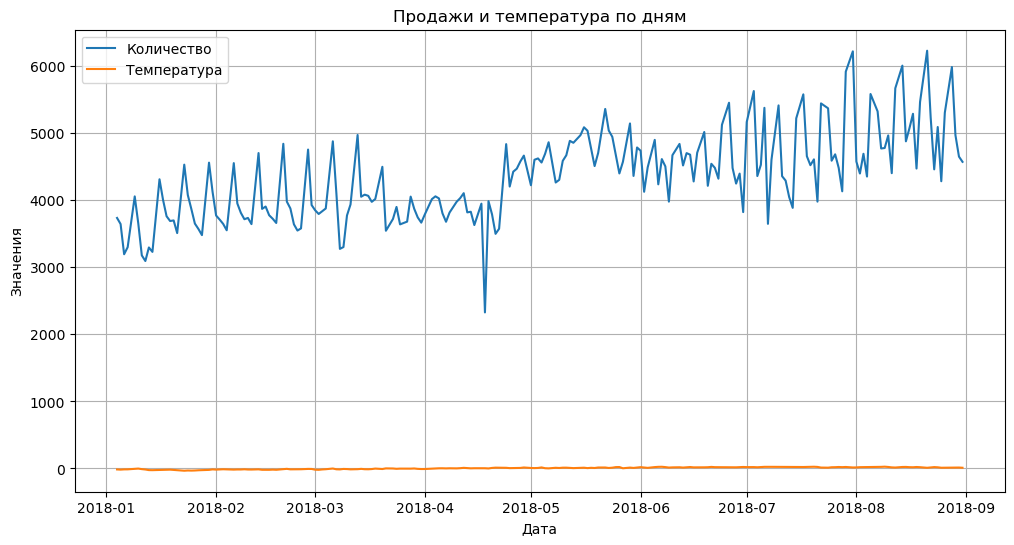

In [84]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['Дата'], merged_df['Количество'], label='Количество')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.title('Продажи и температура по дням')
plt.legend()
plt.grid(True)
plt.show()


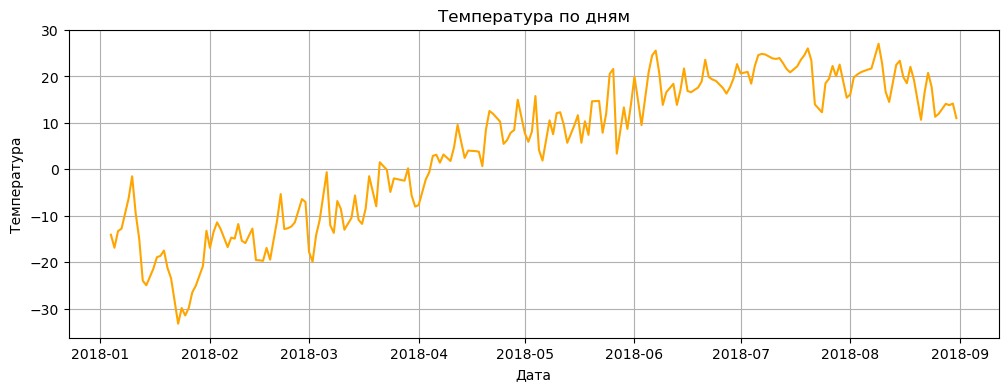

In [85]:
plt.figure(figsize=(12,4))
plt.plot(merged_df['Дата'], merged_df['T'], color='orange')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Температура по дням')
plt.grid(True)
plt.show()
